<a href="https://colab.research.google.com/github/lpaolariosm/Ecuaciones-Diferenciales-Parciales-I/blob/main/Ecuaci%C3%B3n_de_Legendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:orange;"> " Ecuación de Legendre "</span>
<span style="color:red;">**$(1-x^2)y''-2xy'+n(n+1)y=0$**</span>

El parámetro $n$ es un numero real dado. Cuando $n$ es un entero las soluciones son los polinomios de Legendre de grado $n$




\begin{align*}
P_n(x) = \frac{1}{2^n}\sum_{k=0}^m\frac{(-1)^m}{m!}\frac{(2n-2m)!}{(n-2m)!(n-m)!}\,x^{n-2m},\quad n=0,1,2,\ldots
\end{align*}


Donde:

$M= \frac{n}{2}$  o $M= \frac{n-1}{2}$


<span style="color:orange;">1. Utlizando las librerías sympy y scipy de python, realizar lo siguiente: </span>


<span style="color:black;">a) Graficar en un solo panel los polinomios de Legendre, $P_n(x)$ para $n=0,...,5$</span>


$P_0(x) = 1, \quad P_1(x) = x, \quad P_2(x) = \frac{1}{2} (-1 + 3x^2),$


$P_3(x) = \frac{1}{2} (-3x + 5x^3), \quad P_4(x) = \frac{1}{8} (3 - 30x^2 + 35x^4),$


$P_5(x) = \frac{1}{8} (15x - 70x^3 + 63x^5).$


Importacion de librerias: NOTA usamos *from scipy.special import legendre* para ecuaciones especiales

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

*Configuración de los gráficos (usando estilos disponibles)*

In [ ]:
plt.style.use('ggplot')  # Cambiado de 'seaborn' a 'ggplot' que es un estilo estándar
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12


Grados de los polinomios a graficar


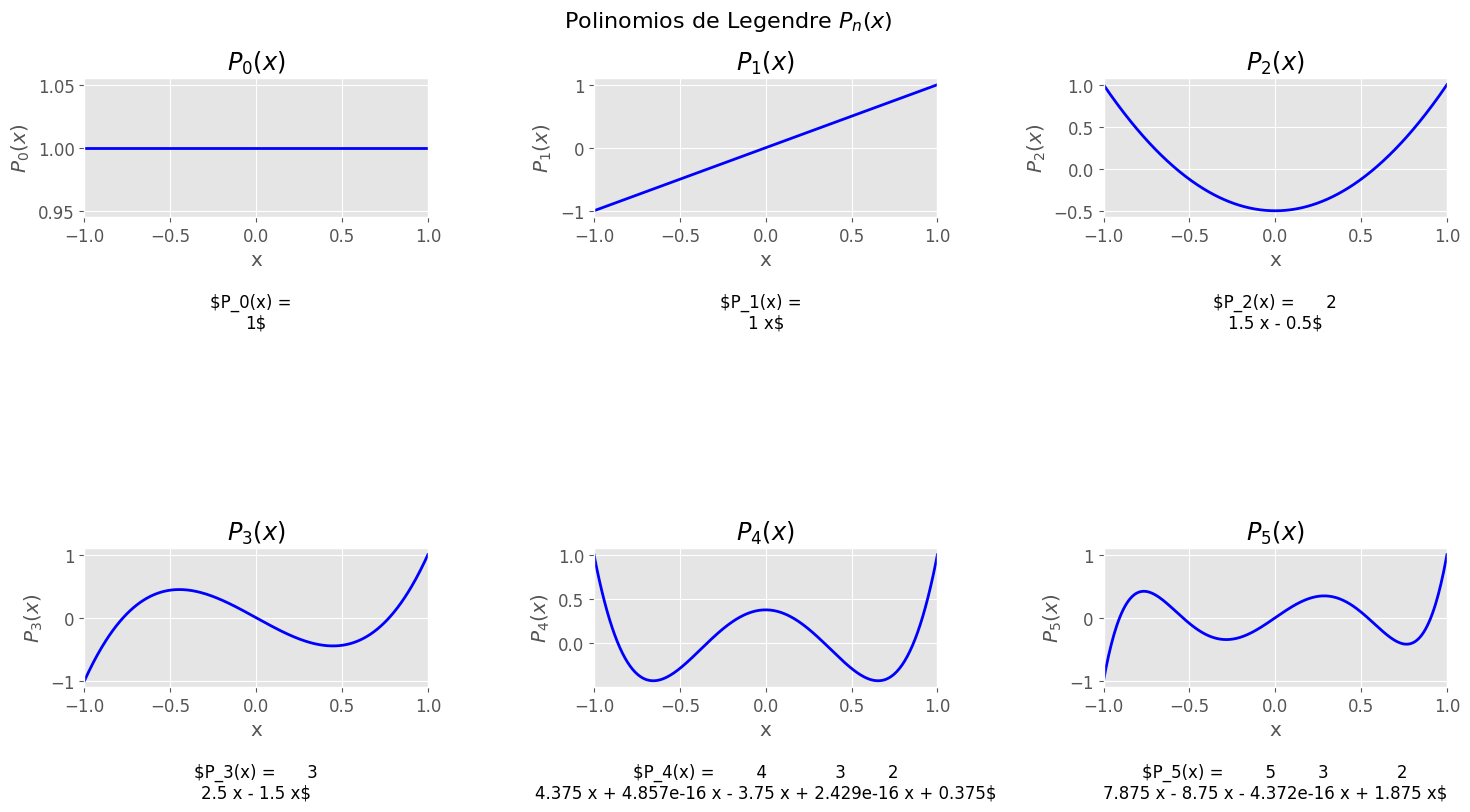

In [ ]:
degrees = [0, 1, 2, 3, 4, 5]

# Crear una figura con subgráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Polinomios de Legendre $P_n(x)$', fontsize=16)

# Rango de valores de x para graficar
x_vals = np.linspace(-1, 1, 400)

for i, n in enumerate(degrees):
    # Obtener el polinomio de Legendre de grado n
    Pn = legendre(n)

    # Evaluar el polinomio en los puntos x_vals
    y_vals = Pn(x_vals)

    # Graficar en el subgráfico correspondiente
    ax = axs[i//3, i%3]
    ax.plot(x_vals, y_vals, 'b-', linewidth=2)

    ax.set_title(f'$P_{n}(x)$')
    ax.set_xlabel('x')
    ax.set_ylabel(f'$P_{n}(x)$')
    ax.grid(True)
    ax.set_xlim(-1, 1)

    # Añadir la expresión del polinomio como texto
    poly_expr = f"$P_{n}(x) = {str(Pn).replace('leg', 'P')}$"
    ax.text(0.5, -0.8, poly_expr, ha='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()

<span style="color:black;">b. Mostrar gráficamente que se satisface la relación (hágalo para n=3): \\
$(1-x^2)P'_n(x)=(n+1)xP_n(x)-(n+1)P_{n+1}(x)$ </span>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre


Valor de n

In [ ]:
n = 3
x_vals = np.linspace(-1, 1, 400)


Polinomios de Legendre y sus derivadas

In [ ]:
Pn = legendre(n)
Pn1 = legendre(n + 1)
Pn_prime = Pn.deriv()


Lados de la ecuación

In [ ]:
lhs = (1 - x_vals**2) * Pn_prime(x_vals)
rhs = (n + 1) * x_vals * Pn(x_vals) - (n + 1) * Pn1(x_vals)

**Gráfica**

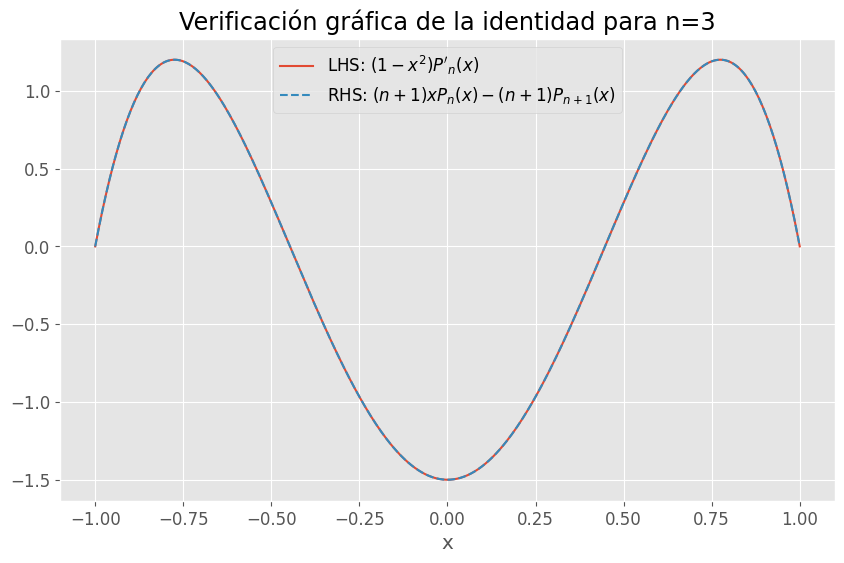

In [ ]:
plt.plot(x_vals, lhs, label='LHS: $(1 - x^2)P\'_n(x)$')
plt.plot(x_vals, rhs, '--', label='RHS: $(n+1)xP_n(x) - (n+1)P_{n+1}(x)$')
plt.title('Verificación gráfica de la identidad para n=3')
plt.xlabel('x')
plt.legend()
plt.grid(True)
plt.show()


<span style="color:black;">c. Mostrar algebraicamente que se satisface la relación (hágalo para n=3): \\
$(1-x^2)P'_n(x)=(n+1)xP_n(x)-(n+1)P_{n+1}(x)$ </span>

In [ ]:
import sympy as sp

In [ ]:
x = sp.symbols('x')
n = 3


Polinomios

In [ ]:
Pn = sp.legendre(n, x)
Pn1 = sp.legendre(n + 1, x)
Pn_prime = sp.diff(Pn, x)


Lado derecho y izquierdo de la ecuaciòn

In [ ]:
lhs = sp.expand((1 - x**2) * Pn_prime)

rhs = sp.expand((n + 1) * x * Pn - (n + 1) * Pn1)

In [ ]:
#Mostrar ambos lados
print("Lado izquierdo:")
sp.pprint(lhs)

print("\nLado derecho:")
sp.pprint(rhs)

# Mostrar diferencia
print("\nDiferencia simplificada:")
sp.pprint(sp.simplify(lhs - rhs))


Lado izquierdo:
      4           
  15⋅x       2   3
- ───── + 9⋅x  - ─
    2            2

Lado derecho:
      4           
  15⋅x       2   3
- ───── + 9⋅x  - ─
    2            2

Diferencia simplificada:
0


<span style="color:purple;"> d. Mostrar algebraicamente que se satisface la relación (hágalo para n=3):
$$
(n+1)P_{n+1}(x)-(2n+1)xP_n(x)+nP_{n-1}(x)=0, \quad n=0,1,2,...
$$ </span>

In [ ]:
import sympy as sp

# Definir la variable simbólica
x = sp.symbols('x')
n = 3

In [ ]:
# Construir cada término
term1 = (n + 1) * P4          # 4*P4(x)
term2 = (2*n + 1) * x * P3    # 7x*P3(x)
term3 = n * P2                # 3*P2(x)

In [ ]:
# Mostrar los términos
print("Término 1: 4 * P4(x)")
sp.pprint(term1)

Término 1: 4 * P4(x)
    4            
35⋅x        2   3
───── - 15⋅x  + ─
  2             2


In [ ]:
print("\nTérmino 2: 7 * x * P3(x)")
sp.pprint(term2)



Término 2: 7 * x * P3(x)
    ⎛   3      ⎞
    ⎜5⋅x    3⋅x⎟
7⋅x⋅⎜──── - ───⎟
    ⎝ 2      2 ⎠


In [ ]:
print("\nTérmino 3: 3 * P2(x)")
sp.pprint(term3)


Término 3: 3 * P2(x)
   2    
9⋅x    3
──── - ─
 2     2


In [ ]:

# Construir la expresión completa
expr = term1 - term2 + term3
print("\nExpresión combinada:")
sp.pprint(expr)


Expresión combinada:
    4       2       ⎛   3      ⎞
35⋅x    21⋅x        ⎜5⋅x    3⋅x⎟
───── - ───── - 7⋅x⋅⎜──── - ───⎟
  2       2         ⎝ 2      2 ⎠


In [ ]:
# Simplificar para verificar si es cero
simplified_expr = sp.simplify(expr)
print("\n¿La expresión es cero al simplificar?")
sp.pprint(simplified_expr)



¿La expresión es cero al simplificar?
0


como salida nos arroja lo siguiente:
<span style="color:magenta;">$$
\frac{35x^4}{2}-\frac{21x^2}{2}-7x(\frac{5x^3}{2}-\frac{3x}{2})=0\\
\therefore es \quad igual \quad a \quad cero
$$
 </span>

<span style="color:black;">e. Muestre que se cumple la fórmula de Rodrigues, ejemplificando para $n=0,1,...,5$: \\
$$
P_n(x)=\frac{1}{2^n n!}\frac{d^n}{d x^n} (x^2-1)^n, \quad n=0,1,2,...
$$ </span>

In [ ]:
from math import factorial

In [ ]:
for n in range(6):
    rod_expr = ((x**2 - 1)**n)
    rod_derivative = sp.diff(rod_expr, x, n)
    rod_final = sp.simplify((1 / (2**n * factorial(n))) * rod_derivative)
    legendre_expr = sp.legendre(n, x)


In [ ]:
print(f"\n--- n = {n} ---")
print("Rodrigues:")
sp.pprint(rod_final)
print("Legendre:")
sp.pprint(legendre_expr)
print("¿Coinciden?:", sp.simplify(rod_final - legendre_expr) == 0)



--- n = 5 ---
Rodrigues:
  ⎛       4         2        ⎞
x⋅⎝7.875⋅x  - 8.75⋅x  + 1.875⎠
Legendre:
    5       3       
63⋅x    35⋅x    15⋅x
───── - ───── + ────
  8       4      8  
¿Coinciden?: True


como salida nos arroja lo siguiente:
<span style="color:red;"> $$
n=5 \\
Rodrigues: \\
x(7.875x^4-8.75x^2+1.875) \\
Legendre: \\
\frac{63x^5}{8}-\frac{35x^3}{4}+\frac{15x}{8}\\
\therefore COINCIDEN
$$
 </span>